<a href="https://colab.research.google.com/github/nathanschoeck/Computer-Vision/blob/main/SIFT_Descriptor_for_rotation_invariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The SIFT descriptor is inherently rotation-invariant. It computes keypoints and descriptors that remain consistent under image rotations. Below is Python code that demonstrates SIFT's rotation invariance by detecting and matching features between an original image and a rotated version.

1. Import Libraries

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

2. Load the base image

In [4]:
image_path = "/Girl_with_a_Pearl_Earring.jpg"  # Replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # SIFT works with grayscale images

3. Rotate the image by a specific angle

In [5]:
rotation_angle = 45  # Rotate by 45 degrees
(h, w) = img.shape[:2]
center = (w // 2, h // 2)  # Image center for rotation
rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)
rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))

4. Initialize the SIFT detector

In [6]:
sift = cv2.SIFT_create()

5. Detect keypoints and compute descriptors for both images

In [7]:
keypoints1, descriptors1 = sift.detectAndCompute(img, None)
keypoints2, descriptors2 = sift.detectAndCompute(rotated_img, None)

6. Visualize the keypoints for the original and rotated images

In [8]:
img_with_keypoints1 = cv2.drawKeypoints(
    img, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(0, 255, 0)
)
img_with_keypoints2 = cv2.drawKeypoints(
    rotated_img, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(0, 255, 0)
)

7. Display the keypoints

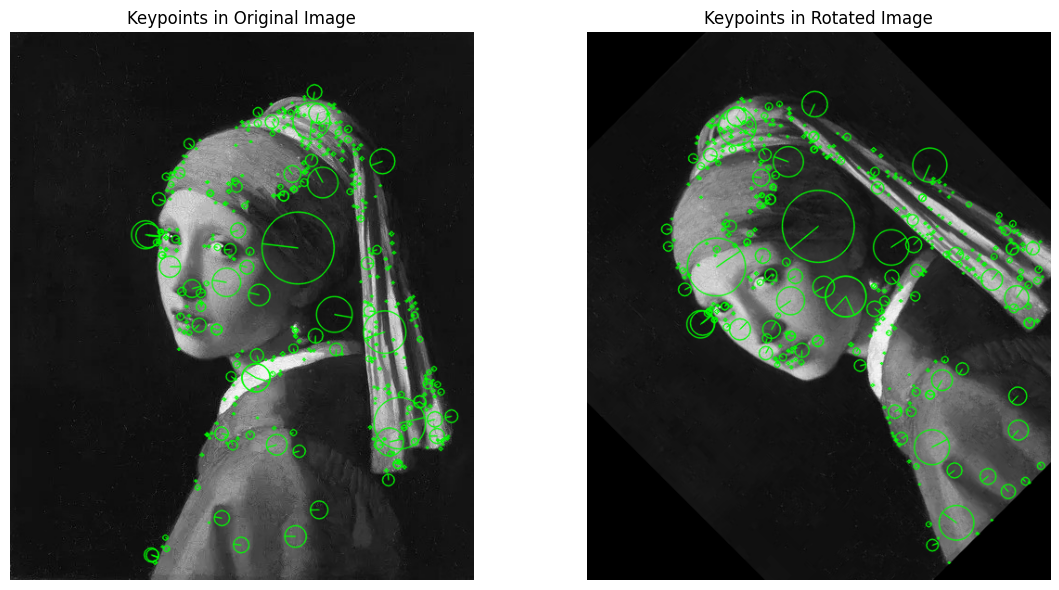

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_with_keypoints1, cmap="gray")
plt.title("Keypoints in Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_with_keypoints2, cmap="gray")
plt.title("Keypoints in Rotated Image")
plt.axis("off")
plt.tight_layout()
plt.show()

8. Match descriptors using BFMatcher

In [10]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

9. Sort matches by distance

In [11]:
matches = sorted(matches, key=lambda x: x.distance)

10. Draw matches between the two images

In [12]:
match_img = cv2.drawMatches(
    img, keypoints1, rotated_img, keypoints2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

11. Display matches

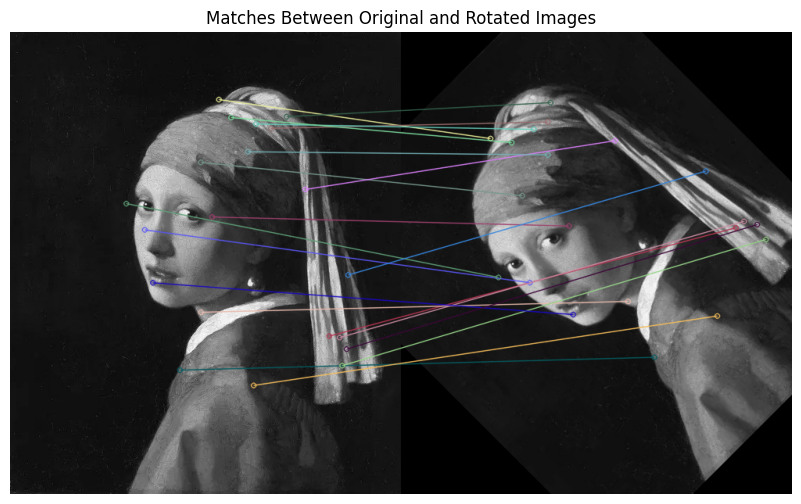

In [13]:
plt.figure(figsize=(12, 6))
plt.imshow(match_img)
plt.title("Matches Between Original and Rotated Images")
plt.axis("off")
plt.show()